# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Loading The Data

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head(6)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Preprocessing¶

In [7]:
isnull_sum=df.isnull().sum()
isnull_sum

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

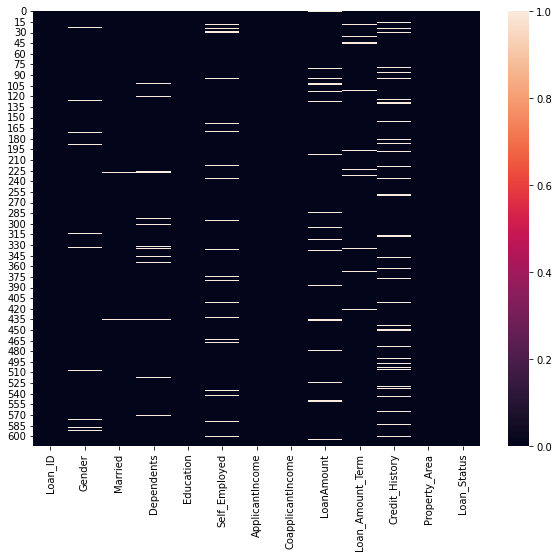

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

In [9]:
null_var = df.isnull().sum()/df.shape[0] *100
null_var

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Missing Numerical Values

In [10]:
num_vars=df.select_dtypes(include=['int64','float64']).columns
num_var_missing=[var for var in num_vars if isnull_sum[var]>0]
num_var_missing

['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [11]:
num_vars

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

# Plotting The Graph

/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

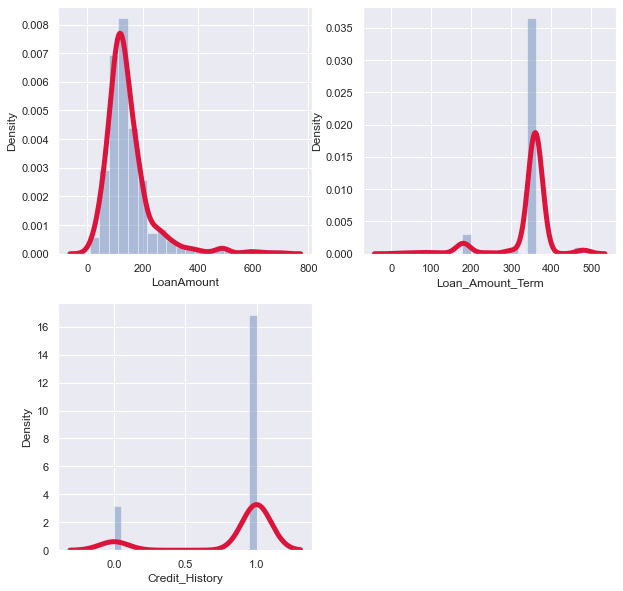

In [12]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(num_var_missing):
    plt.subplot(2,2,i+1)
    sns.distplot(df[var], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

# Missing Categeroical Value

In [13]:
cat_vars=df.select_dtypes(include='object').columns
cat_var_missing=[var for var in cat_vars if isnull_sum[var]>0]
cat_var_missing

['Gender', 'Married', 'Dependents', 'Self_Employed']

# Encoding Categeroical values

In [14]:
df['Married'] = df['Married'].map({'Yes':1,'No':0})
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area'] = df['Property_Area'].map({'Rural':0,'Semiurban':1,'Urban':2})
df['Education'] = df['Education'].map({'Graduate':1,'Not Graduate':0})
df.replace({'Loan_Status':{'N':0,'Y':1}}, inplace=True)
 # Replacing the values for 3+ to 4
df.replace(to_replace='3+',value=4, inplace=True)

In [15]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1.0,1.0,2,1,1.0,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1.0,1.0,0,0,0.0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1.0,1.0,4,1,0.0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1.0,1.0,2,1,0.0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1.0,1.0,1,1,0.0,12841,10968.0,349.0,360.0,1.0,1,0


# Filling Nan Values

In [16]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

<AxesSubplot:>

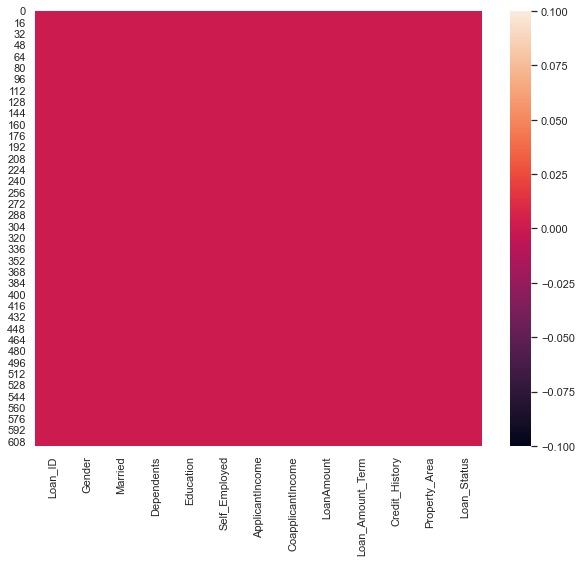

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull())

# Correlation Between Numerical Data

In [18]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,0.364569,1.000000,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.005852,0.004257,0.091478
Education,-0.045364,-0.012304,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.077936,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.014477,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.001665,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.001395,-0.077620,-0.020974
Credit_History,0.012819,0.005852,0.077936,-0.002260,-0.014477,-0.001665,-0.007738,0.001395,1.000000,-0.001880,0.540483
Property_Area,-0.025752,0.004257,0.065243,-0.030860,-0.009500,0.010522,-0.044776,-0.077620,-0.001880,1.000000,0.032112


In [19]:
# correlation matrix,here  if medv value is increased so what value will increase or decrease as we can see on increasing rm the value of proce will increase hence its a strong correlation
corr_matrix=df.corr()
corr_matrix['Loan_Status'].sort_values(ascending=False)

Loan_Status          1.000000
Credit_History       0.540483
Married              0.091478
Education            0.085884
Property_Area        0.032112
Gender               0.017987
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64

array([[<AxesSubplot:xlabel='Credit_History', ylabel='Credit_History'>,
        <AxesSubplot:xlabel='Self_Employed', ylabel='Credit_History'>,
        <AxesSubplot:xlabel='ApplicantIncome', ylabel='Credit_History'>],
       [<AxesSubplot:xlabel='Credit_History', ylabel='Self_Employed'>,
        <AxesSubplot:xlabel='Self_Employed', ylabel='Self_Employed'>,
        <AxesSubplot:xlabel='ApplicantIncome', ylabel='Self_Employed'>],
       [<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>,
        <AxesSubplot:xlabel='ApplicantIncome', ylabel='ApplicantIncome'>]],
      dtype=object)

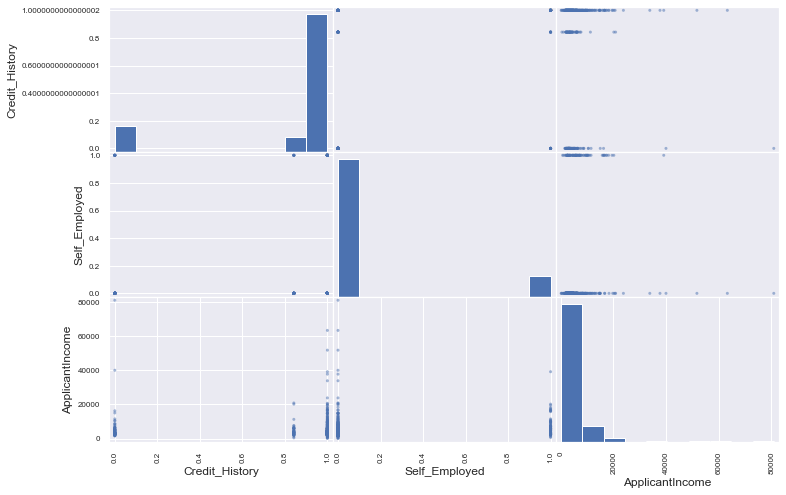

In [20]:
from pandas.plotting import scatter_matrix
# here we will shortlist the graph
attributes=['Credit_History','Self_Employed','ApplicantIncome']
scatter_matrix(df[attributes],figsize=(12,8))

# Analysing Data

In [21]:
# Analyzing the target variable
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [22]:
df['Loan_Status'].value_counts(normalize=True)

1    0.687296
0    0.312704
Name: Loan_Status, dtype: float64

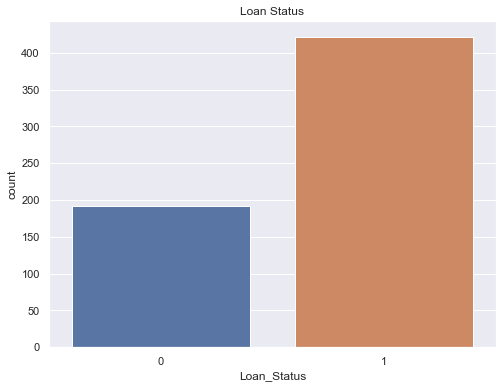

In [23]:
# Representing each category using visualization
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status')
plt.show()

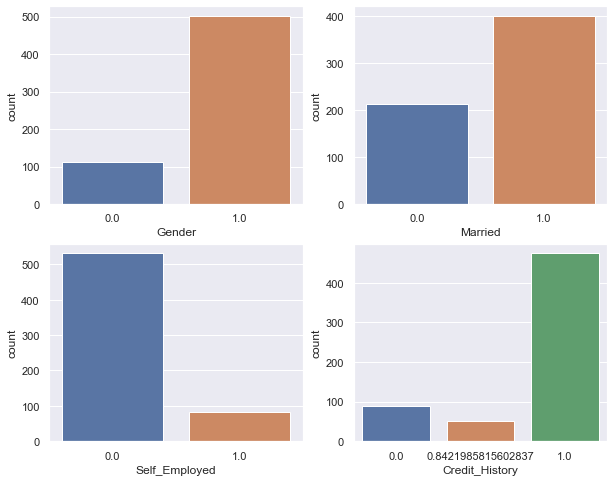

In [24]:
# Analyzing independent variable (Categorical)
# Observations from above plots:

# Nearly 80% of the applicants in dataset are Male.
# Nearly 65% of the applicants in dataset are Married.
# Nearly 15% of the applicants in dataset are Self Employed.
# Nearly 85% of the applicants have repaid their debts.

plt.figure(figsize=(10,8))
plt.subplot(221)
sns.countplot(x='Gender',data=df)
# plt.title('Gender')
plt.subplot(222)
sns.countplot(x='Married',data=df)
# plt.title('Married')
plt.subplot(223)
sns.countplot(x='Self_Employed',data=df)
# plt.title('Self_Employed')
plt.subplot(224)
sns.countplot(x='Credit_History',data=df)
# plt.title('Credit_History')
plt.show()

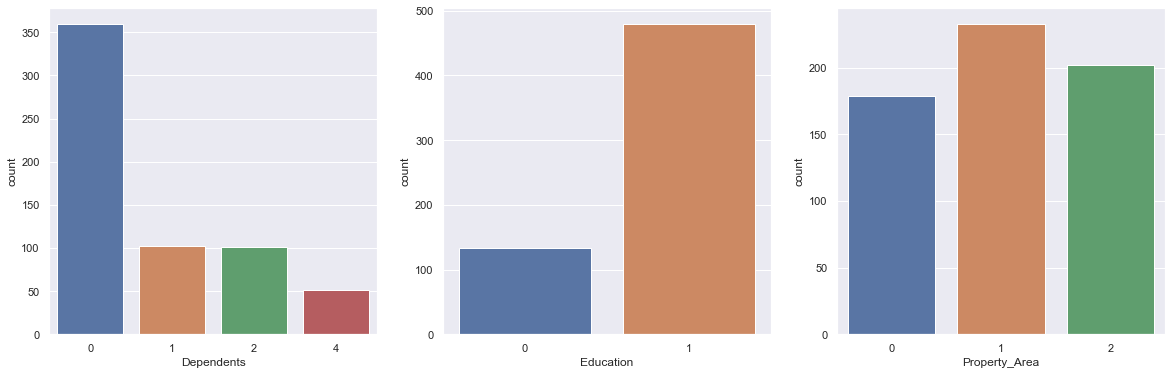

In [25]:
# Analyzing Independent variable (Ordinal)
# Observations can be made from above barplots:

# Most of the applicants doesn't have any dependents.
# Around 80% of the applicants are Graduate.
# Most of the applicants are form Semi-Urban Area
plt.figure(figsize=(20,6))
plt.figure(num=1)
plt.subplot(131)
sns.countplot(x='Dependents', data=df)
plt.subplot(132)
sns.countplot(x='Education', data=df)
plt.subplot(133)
sns.countplot(x='Property_Area', data=df)
plt.show()

<AxesSubplot:xlabel='Education', ylabel='count'>

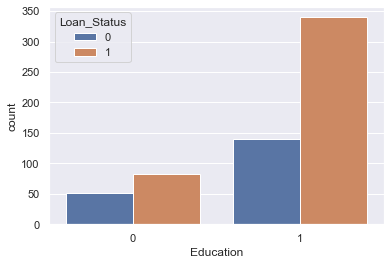

In [26]:
# education and Loan Status

sns.countplot(x='Education',hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

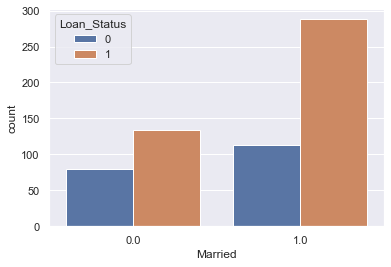

In [27]:
sns.countplot(x='Married',hue='Loan_Status',data=df)



<AxesSubplot:xlabel='Dependents', ylabel='count'>

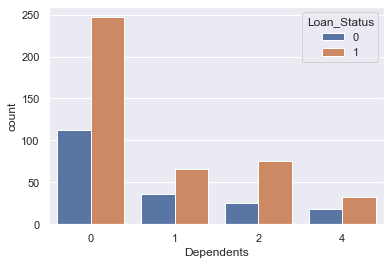

In [28]:
sns.countplot(x='Dependents',hue='Loan_Status', data=df)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

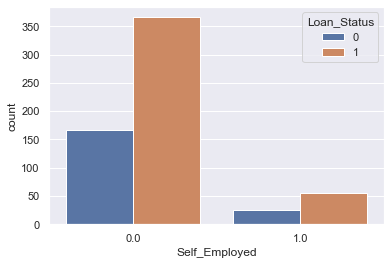

In [29]:
sns.countplot(x='Self_Employed',hue='Loan_Status', data=df)

# Train-Test-Splitting

In [30]:
# separating the data and label

X = df.drop(columns=['Loan_ID','Loan_Status'])
y = df.Loan_Status

In [31]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2
1,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2
3,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2
4,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2


In [32]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=2)

In [34]:
print("shape of x_train=",X_train.shape)
print("shape of x_test=",X_test.shape)
print("shape of y_train=",y_train.shape)
print("shape of y_test=",y_test.shape)

shape of x_train= (491, 11)
shape of x_test= (123, 11)
shape of y_train= (491,)
shape of y_test= (123,)


# Making Pipeline

In [35]:
num_var_median=['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
cat_var_mode=['Gender', 'Married', 'Dependents', 'Self_Employed']
num_var_median_imputer=Pipeline(steps=[("imputer",SimpleImputer(strategy='median'))])
cat_var_mode_imputer=Pipeline(steps=[("imputer",SimpleImputer(strategy="most_frequent"))])

In [36]:
preprocessor=ColumnTransformer(transformers=[
                               ("median_imputer",num_var_median_imputer,num_var_median),
                               ("mode_imputer",cat_var_mode_imputer,cat_var_mode)])

In [37]:
preprocessor

ColumnTransformer(transformers=[('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['LoanAmount', 'Loan_Amount_Term',
                                  'Credit_History']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Gender', 'Married', 'Dependents',
                                  'Self_Employed'])])

In [38]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('median_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['LoanAmount', 'Loan_Amount_Term',
                                  'Credit_History']),
                                ('mode_imputer',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Gender', 'Married', 'Dependents',
                                  'Self_Employed'])])

In [39]:
x_train_clean=preprocessor.transform(X_train)
x_test_clean=preprocessor.transform(X_test)

In [40]:
dataframe=pd.DataFrame(x_train_clean,columns=num_var_median+cat_var_mode)

In [41]:
dataframe.head(10)

,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Dependents,Self_Employed
0,30.0,360.0,1.0,0.0,0.0,0,0.0
1,260.0,360.0,1.0,1.0,1.0,4,1.0
2,123.0,480.0,1.0,1.0,1.0,1,0.0
3,136.0,360.0,1.0,1.0,0.0,0,0.0
4,132.0,360.0,0.842199,0.0,0.0,0,0.0
5,120.0,342.0,1.0,0.0,0.0,0,0.0
6,175.0,342.0,1.0,1.0,1.0,0,0.0
7,146.412162,360.0,1.0,1.0,1.0,1,1.0
8,110.0,360.0,1.0,1.0,0.0,0,0.0
9,67.0,360.0,1.0,0.0,0.0,0,0.0


In [42]:
dataframe.isnull().sum()

LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Gender              0
Married             0
Dependents          0
Self_Employed       0
dtype: int64

In [43]:
df.update(dataframe)

In [44]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,30.0,360.0,1.0,2,1
1,LP001003,1.0,1.0,4,1,1.0,4583,1508.0,260.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,1,1,0.0,3000,0.0,123.0,480.0,1.0,2,1
3,LP001006,1.0,0.0,0,0,0.0,2583,2358.0,136.0,360.0,1.0,2,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,132.0,360.0,0.842199,2,1
5,LP001011,0.0,0.0,0,1,0.0,5417,4196.0,120.0,342.0,1.0,2,1
6,LP001013,1.0,1.0,0,0,0.0,2333,1516.0,175.0,342.0,1.0,2,1
7,LP001014,1.0,1.0,1,1,1.0,3036,2504.0,146.412162,360.0,1.0,1,0
8,LP001018,1.0,0.0,0,1,0.0,4006,1526.0,110.0,360.0,1.0,2,1
9,LP001020,0.0,0.0,0,1,0.0,12841,10968.0,67.0,360.0,1.0,1,0


# Feature Scalling

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)

StandardScaler()

In [47]:
x_train_sc=sc.transform(X_train)
x_test_sc=sc.transform(X_test)


# Training The Model

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [49]:
# Logistic Regression
log_reg =  LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
log_score = cross_val_score(log_reg, X_train, y_train,cv=5)
print("Logistic Regression: ", round(log_score.mean(),2)*100, "% accuracy score")

# Support Vector Machine
svc = SVC()
svc.fit(X_train, y_train)
svc_score = cross_val_score(svc, X_train, y_train,cv=5)
print("Support Vector Machine: ", round(svc_score.mean(),2)*100, "% accuracy score")

# KNeighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = cross_val_score(knn, X_train, y_train,cv=5)
print("KNeighbors: ", round(knn_score.mean(),2)*100, "% accuracy score")

# Decision Tree
dcTree = DecisionTreeClassifier()
dcTree.fit(X_train, y_train)
dcTree_score = cross_val_score(dcTree, X_train, y_train, cv=5)
print("Decision Tree: ", round(dcTree_score.mean(),2)*100, "% accuracy score")

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_score = cross_val_score(rf, X_train, y_train, cv=5)
print("Random Forest: ",  round(rf_score.mean(),2)*100, "% accuracy score")

Logistic Regression:  81.0 % accuracy score
Support Vector Machine:  69.0 % accuracy score
KNeighbors:  63.0 % accuracy score
Decision Tree:  69.0 % accuracy score
Random Forest:  78.0 % accuracy score


In [50]:
X_test_prediction = log_reg.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [51]:
print('Accuracy on test data : ', test_data_accuracy)

Accuracy on test data :  0.8048780487804879


In [52]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
270,0.0,0.0,0,1,0.0,3237,0.0,30.0,360.0,1.000000,2
557,1.0,1.0,4,1,1.0,10139,0.0,260.0,360.0,1.000000,1
248,1.0,1.0,1,1,0.0,2882,1843.0,123.0,480.0,1.000000,1
110,1.0,0.0,0,1,0.0,5316,0.0,136.0,360.0,1.000000,2
323,0.0,0.0,0,1,0.0,3166,2985.0,132.0,360.0,0.842199,0


# Testing The Model

In [53]:
# answer is no
features=np.array([[1,1,0,0,1,3,182,33,4,0,1]])
log_reg.predict(features)
# answer is yes
features=np.array([[1,1,0,0,1,3,182,33,4,1,1]])
log_reg.predict(features)

/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

# Saving The Model

In [54]:
import pickle

In [55]:
with open('model_pickle','wb') as f:
    pickle.dump(log_reg,f)